In [1]:
import numpy as np
import matplotlib.pyplot as plt

## List of fuzzy numbers

In [2]:
def fuzzy_number_triangular(X, Mu, left, right):
    """
    Triangular fuzzy number
    
    Parameters:
    -----------
    X : array
        the input range, can be an array of floating points
    Mu : integer or float
        the mean of the fuzzy number
    left : integer or float
        left expansion of the fuzzy number
    right : integer or float
        right expansion of the fuzzy number
    """
    ## apply the left expansion on all the input
    ## then using np.where apply the right expansion to the data
    
    ## Apply the right expansion in the first condition
    ## and apply the left expansion in the left condition
    Y = np.where(X > Mu, (right - X) / (right - Mu) ,(X - left) / (Mu - left))
    ## zero the negative numbers
    Y = np.where(Y < 0, 0, Y)
    
    return Y

def fuzzy_number_trapezodial(x, outer_values, inner_values, highest_value):
    """
    Trapezodial fuzzy number
    
    Parameters:
    -----------
    x : array
        the input range, can be an array of floating points
    outer_values : tuple with length 2, contains integer or floats
        the tuple contains the left most and the right most values
        
        the parameters are as
        `left` : integer or float
            the left most value of the trapezodial which its y value is zero
        `right` : integer or float
            the right most value of the trapezodial which its y value is zero
    inner_values : tuple with length 2, contains integer or floats
        the tuple contains the left most and the right most values
        
        the parameters are as
        `left` : integer or float
            the inner left value of the trapezodial which its y value is the highest value
        `right` : integer or float
            the inner right value of the trapezodial which its y value is the highest value
    highest_value : integer or float
        the highest value that the trapezodial would go up
        
    Returns:
    ---------
    mu : float values
        the float values representing the fuzzy membership values
    """
    ## the slope that the value would start from zero
    first_slope = highest_value / (inner_values[0] - outer_values[0])
    second_slope = highest_value / (inner_values[1] - outer_values[1])
    
    ## initializing mu
    mu = np.zeros(len(x))
    
    mu = np.where((x >= outer_values[0]) & (x <= inner_values[0]), first_slope * (x - outer_values[0]), mu)
    
    ## applying the outer values to zero
    mu = np.where((x <= outer_values[0]) | (x >= outer_values[1]), 0, mu)
    ## applying the middle values to one
    mu = np.where((x > inner_values[0]) & (x <= inner_values[1]), highest_value, mu)
    
    mu = np.where((x > inner_values[1]) & (x < outer_values[1]), second_slope * (x - outer_values[1]), mu)
    
    return mu

def fuzzy_number_microwave(X, Sigma, Mu):
    """
    The microwave distribution
    
    Paremeters:
    ------------
    X : array_like
        the input range, can be an array of floating points
    Sigma : float
        the variance for gaussian distribution
    Mu : float
        the mean for gaussian distribution
        
    Returns:
    ---------
    Y : array_like
        same dimension as input `X`
        the values representing gaussian distribution
    """
    p1 = 1 / np.sqrt(2 * np.pi * (Sigma**2))
    p2 = np.exp(-np.power(X - Mu, 2) / (2*(Sigma**2)))

    Y = p1 * p2
    return Y

def fuzzy_number_sigmoid(X, Mu, Sigma):
    """
    The sigmoid distribution
    
    Paremeters:
    ------------
    X : array_like
        the input range, can be an array of floating points
    Sigma : float
        the variance for gaussian distribution
    Mu : float
        the mean for gaussian distribution
        
    Returns:
    ---------
    Y : array_like
        same dimension as input `X`
        the values representing gaussian distribution
    """
    p1 = 1 / (1 + np.exp(-((X - Mu) / Sigma)))
    return p1

def fuzzy_number_slope_triangular(X, Mu, left, right):
    """
    Triangular fuzzy number
    
    Parameters:
    -----------
    X : array
        the input range, can be an array of floating points
    Mu : integer or float
        the mean of the fuzzy number
    left : integer or float
        left expansion of the fuzzy number
    right : integer or float
        right expansion of the fuzzy number
    """
    ## apply the left expansion on all the input
    ## then using np.where apply the right expansion to the data
    
    ## Apply the right expansion in the first condition
    ## and apply the left expansion in the left condition
    Y = np.where(X > Mu, (right - X) / (right - Mu) ,(X - left) / (Mu - left))
    ## zero the negative numbers
    Y = np.where(Y < 0, 0, Y)
    
    return Y

## A Fuzzy Logic-based Control System for Microwave Ovens

In [3]:
x_range = np.linspace(0, 100, 1000000)

# Rule 1 - Input using triangular fuzzy number - typeOfFood
rule1_out = fuzzy_number_triangular(x_range, Mu=50, left=20, right=80)
# Rule 2 - Input using triangular fuzzy number - QuantityOfFood
rule2_out = fuzzy_number_triangular(x_range, Mu=50, left=20, right=80)

Rule1_L = np.stack((x_range - 50, rule1_out))
Rule1_M = np.stack((x_range, rule1_out))
Rule1_H = np.stack((x_range + 50, rule1_out))

Rule2_L = np.stack((x_range - 50, rule2_out))
Rule2_M = np.stack((x_range, rule2_out))
Rule2_H = np.stack((x_range + 50, rule2_out))

### typeOfFood

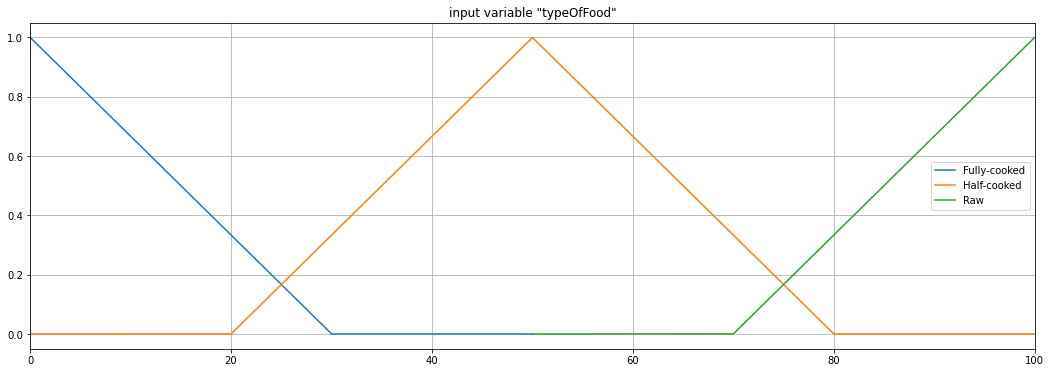

In [14]:
plt.figure(figsize=(18, 6))

plt.plot(Rule1_L[0], Rule1_L[1], label='Fully-cooked')
plt.plot(Rule1_M[0], Rule1_M[1], label='Half-cooked')
plt.plot(Rule1_H[0], Rule1_H[1], label='Raw')
plt.grid()
plt.xlim(0, 100)
plt.legend(loc="best")

plt.title('input variable "typeOfFood"')
plt.savefig('typeOfFood.png')
plt.show()

### QuantityOfFood

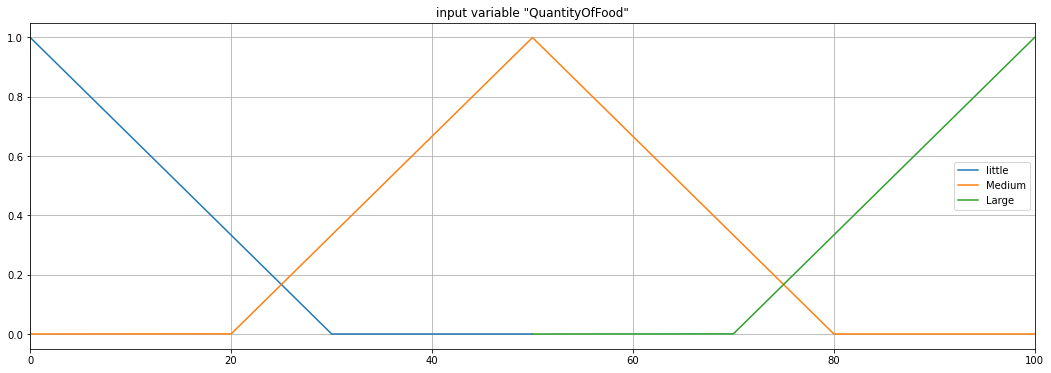

In [5]:
plt.figure(figsize=(18, 6))

plt.plot(Rule2_L[0], Rule2_L[1], label='little')
plt.plot(Rule2_M[0], Rule2_M[1], label='Medium')
plt.plot(Rule2_H[0], Rule2_H[1], label='Large')
# plot range between 0 and 100
plt.xlim(0, 100)
plt.legend(loc="best")
plt.grid()

plt.title('input variable "QuantityOfFood"')
plt.savefig('QuantityOfFood.png')
plt.show()

### CookingTime

In [6]:
c_range = np.linspace(0, 60, 1000000)

cook1_out = fuzzy_number_triangular(c_range, Mu=5, left=0, right=10)
cook2_out = fuzzy_number_triangular(c_range, Mu=12.5, left=5, right=20)
cook3_out = fuzzy_number_triangular(c_range, Mu=25, left=10, right=40)
cook4_out = fuzzy_number_triangular(c_range, Mu=35, left=20, right=50)
cook5_out = fuzzy_number_triangular(c_range, Mu=60, left=40, right=80)
Cook1_vs = np.stack((c_range, cook1_out))
Cook2_s = np.stack((c_range, cook2_out))
Cook3_m = np.stack((c_range, cook3_out))
Cook4_l = np.stack((c_range, cook4_out))
Cook5_vl = np.stack((c_range, cook5_out))

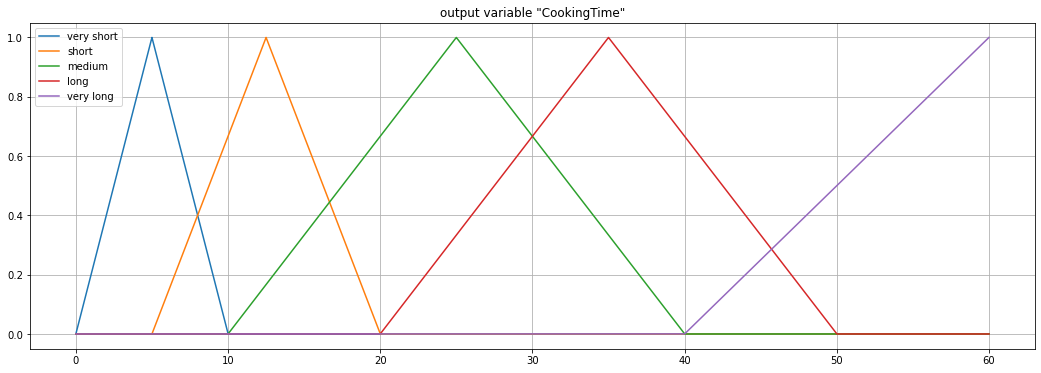

In [7]:
plt.figure(figsize=(18, 6))

plt.plot(Cook1_vs[0], Cook1_vs[1], label='very short')
plt.plot(Cook2_s[0], Cook2_s[1], label='short')
plt.plot(Cook3_m[0], Cook3_m[1], label='medium')
plt.plot(Cook4_l[0], Cook4_l[1], label='long')
plt.plot(Cook5_vl[0], Cook5_vl[1], label='very long')
plt.grid()

plt.title('output variable "CookingTime"')
plt.savefig('CookingTime.png')
plt.legend(loc="best")

## The inference engine


<center>
    <table>
    <tr>
        <th> 
            \
        </th>
        <th>
            TypeOfFood (Fully-cooked)
        </th>
        <th>
            TypeOfFood (Half-cooked)
        </th>
        <th>
            TypeOfFood (Raw)
    </tr>
    <tr>
        <td>
            <strong>QuantityOfFood (Large)</strong>
        </td>
        <td>
            Medium
        </td>
         <td>
            Short
        </td>
         <td>
            Very-Short
        </td>
    </tr>
    <tr>
        <td>
            <strong>QuantityOfFood (Medium)</strong>
        </td>
        <td>
            Long
        </td>
         <td>
            Medium
        </td>
         <td>
            Short
        </td>
    </tr>
    <tr>
        <td>
            <strong>QuantityOfFood (Little)</strong>
        </td>
        <td>
            Very-Long
        </td>
         <td>
            Long
        </td>
         <td>
            Medium
        </td>
    </tr>
    </table>
</center>

### TypeOfFood = 50

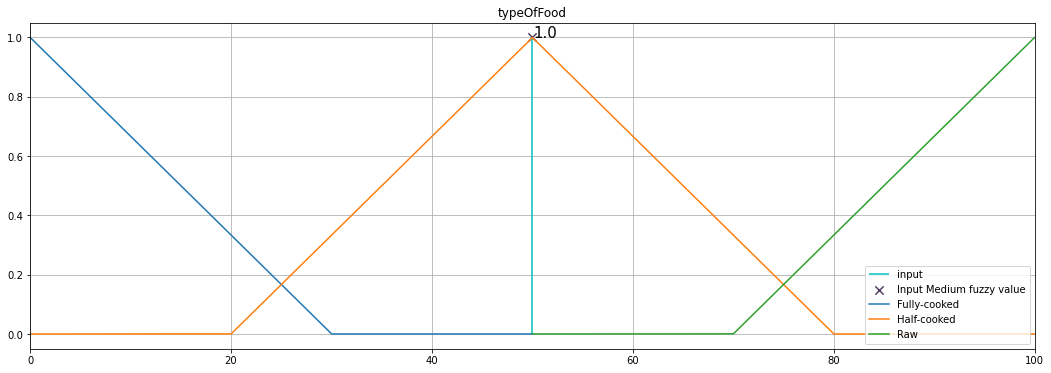

In [12]:
degree = 50


typeValueMedium = Rule1_M[1, np.isclose(degree, Rule1_M[0])][0]

plt.figure(figsize=(18, 6))
## the input 
plt.vlines(degree, 0, 1, colors='c', label='input')

## the fuzzy values for input
plt.scatter(degree, typeValueMedium, marker='x', color='#543E61', label='Input Medium fuzzy value', s=70)
plt.annotate(np.round(typeValueMedium, 3), (degree + 0.1, typeValueMedium), size=15)

## plotting the rules
plt.plot(Rule1_L[0], Rule1_L[1], label='Fully-cooked')
plt.plot(Rule1_M[0], Rule1_M[1], label='Half-cooked')
plt.plot(Rule1_H[0], Rule1_H[1], label='Raw')
plt.xlim(0, 100)
plt.grid()
plt.title('typeOfFood')
plt.legend(loc="lower right")

### QuantityOfFood = 50

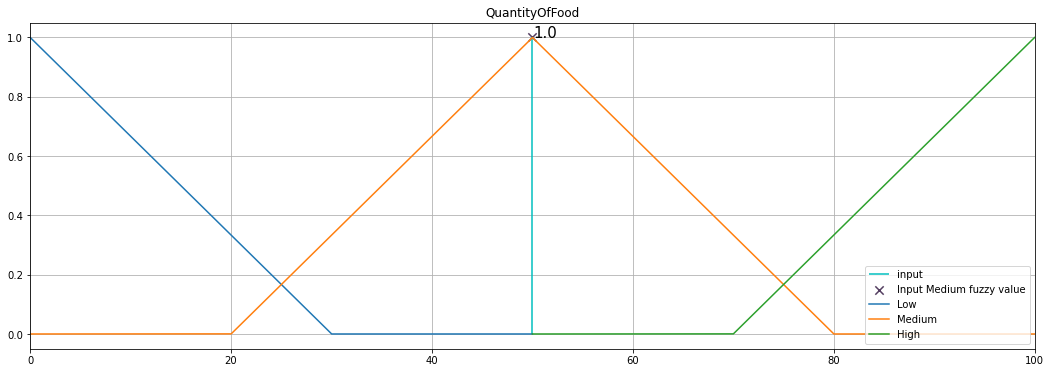

In [13]:
quantityValueMedium = Rule2_M[1, np.isclose(degree, Rule2_M[0])][0]

plt.figure(figsize=(18, 6))
## the input 
plt.vlines(degree, 0, 1, colors='c', label='input')

## the fuzzy values for input
plt.scatter(degree, quantityValueMedium, marker='x', color='#543E61', label='Input Medium fuzzy value', s=70)
plt.annotate(np.round(quantityValueMedium, 3), (degree + 0.1, quantityValueMedium), size=15)

## plotting the rules
plt.plot(Rule2_L[0], Rule2_L[1], label='Low')
plt.plot(Rule2_M[0], Rule2_M[1], label='Medium')
plt.plot(Rule2_H[0], Rule2_H[1], label='High')
plt.xlim(0, 100)
plt.grid()
plt.title('QuantityOfFood')

plt.legend(loc="lower right")

### CookingTime = 25

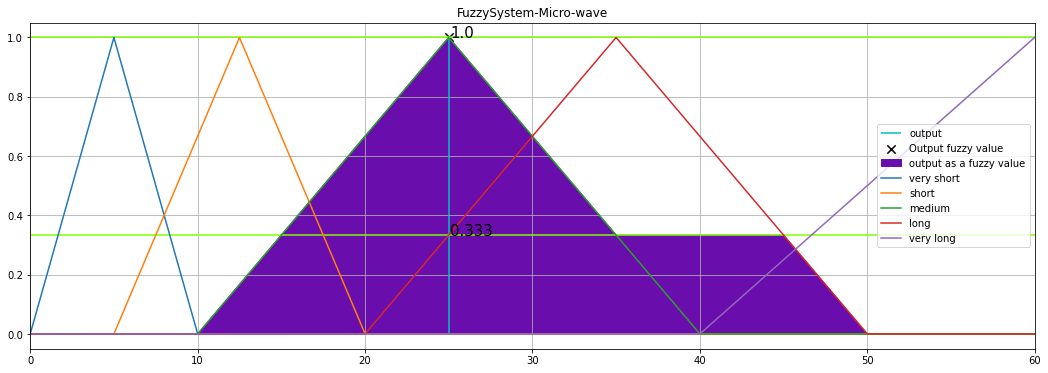

In [10]:
cooktime = 25

cookValueMedium = Cook3_m[1, np.isclose(cooktime, Cook3_m[0])][0]
cookValueLarge = Cook4_l[1, np.isclose(cooktime, Cook4_l[0])][0]

plt.figure(figsize=(18, 6))

plt.vlines(cooktime, 0, 1, colors='c', label='output')
plt.scatter(cooktime, cookValueMedium, marker='x', color='#000000', label='Output fuzzy value', s=70)
plt.hlines(cookValueMedium, 0, 60 , colors='#7FFF00')
plt.hlines(cookValueLarge, 0, 60 , colors='#7FFF00')

plt.annotate(np.round(cookValueMedium, 3), (cooktime + 0.1, cookValueMedium), size=15)
plt.annotate(np.round(cookValueLarge, 3), (cooktime + 0.1, cookValueLarge), size=15)

plt.fill(Cook3_m[0, Cook3_m[1] <= cookValueMedium], Cook3_m[1, Cook3_m[1] <= cookValueMedium], color='#6a0dad', label='output as a fuzzy value')
plt.fill(Cook4_l[0, Cook4_l[1] <= cookValueLarge], Cook4_l[1, Cook4_l[1] <= cookValueLarge], color='#6a0dad')

plt.plot(Cook1_vs[0], Cook1_vs[1], label='very short')
plt.plot(Cook2_s[0], Cook2_s[1], label='short')
plt.plot(Cook3_m[0], Cook3_m[1], label='medium')
plt.plot(Cook4_l[0], Cook4_l[1], label='long')
plt.plot(Cook5_vl[0], Cook5_vl[1], label='very long')

plt.xlim(0, 60)
plt.legend(loc="best")
plt.grid()
plt.title('FuzzySystem-Micro-wave')
plt.savefig('FuzzySystem-Micro-wave.png')